In [1]:
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
#from degree_betweenness import *
import pandas as pd
import networkx.algorithms.community as community3
from networkx.algorithms.community import louvain_partitions
import matplotlib.cm as cm
#import community
import community.community_louvain as community_louvain
from networkx.algorithms.community import girvan_newman
import community as cmm
import copy

In [3]:
seed=0
np.random.seed(seed=seed)

In [4]:
path = "./chess_data_2020.csv"
path_to_save = "./nx_saved.jpg"

def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df.dropna()
  return new_df

def create_network_from_dataframe(df, source, target): #ritorna il network creato partendo da un df pulito
   G = nx.from_pandas_edgelist(df, source, target)
   return G

def draw_and_save_network(G,node_size,with_labels,path_to_save): #visualizza e salva in locale un network, prende G, la node-size e un bool se vogliamo mettere o no i labels e il percorso-nome in cui salvare
   fig = nx.draw(G, node_size=node_size, with_labels = with_labels)
   plt.savefig(path_to_save)


df = clean_dataframe(path)
#print(df)

#bip = create_network_from_dataframe(df, )

def save_first3(dataframe):
    new_name = []
    for i in dataframe["Opening"].values:
        
        new_name.append(str(i)[:3])
    
    dataframe = dataframe.drop("Opening", axis=1)
    dataframe.insert(4, "ECO", new_name, False)
    return dataframe



new_df = save_first3(df)
new_df=new_df.dropna()

list_players_white=new_df['White'].values
list_players_black=new_df['Black'].values
list_players_full=list_players_white+list_players_black
unique_players=[]
for i in list_players_white:
    unique_players.append(i)
for i in list_players_black:
    unique_players.append(i)
unique_players=[*set(unique_players)]

graph = nx.Graph()

# Add nodes from the 'white' and 'black' columns
graph.add_nodes_from(new_df['White'], bipartite=0)
graph.add_nodes_from(new_df['Black'], bipartite=1)

# Add edges connecting 'white' and 'opening' nodes
white_opening_edges = [(row['White'], row['ECO']) for _, row in new_df.iterrows()]
graph.add_edges_from(white_opening_edges)

# Add edges connecting 'black' and 'opening' nodes
black_opening_edges = [(row['Black'], row['ECO']) for _, row in new_df.iterrows()]
graph.add_edges_from(black_opening_edges)

# Project the bipartite graph onto the 'opening' nodes
players_graph = nx.bipartite.weighted_projected_graph(graph, unique_players, ratio=True)
print('players graph created')
#pos = nx.spring_layout(players_graph)
#nx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)
#plt.axis('off')
graph_louvain = community3.louvain_communities(players_graph, seed=seed)
partitions = community_louvain.best_partition(players_graph, random_state=seed, randomize=False)
print(partitions)


##### QUI STIAMO SALVANDO IN CSV IL DICTONARY CHE HA AD OGNI COMMUNITY, IL O I PLAYERS ASSOCIATI;
### CHE POI MANIPOLEREMO PER CAPIRE QUALI GIOCATORI SONO IN QUALE COMMUNITY
#path2save = '/Users/francescoaldoventurelli/Desktop/codici_CN/'
#name = 'community_players_LOVAIN_dict.csv'
#save_dict = pd.DataFrame.from_dict(partitions, columns=[])
#save_dict.to_csv(path2save+name)

players graph created
{'Turzo, A': 0, 'Bednarczyk, D': 0, 'Kovanova, B': 3, 'Noboa Silva, K': 4, 'Kocyigit, B': 0, 'Werle, J': 0, 'Simacek, P': 0, 'Gomez Barrera, G': 0, 'Fus, J': 3, 'Cumming, R': 3, 'Marais, N': 0, 'Kopriva, M': 4, 'Havanecz, B': 0, 'Arnaud, A': 4, 'Krzywda, A': 3, 'Lewtak, D': 1, 'Heinechen, J': 2, 'Asprelli, G': 4, 'Serra Pages, J': 0, 'Ding, L': 0, 'Fominykh, M': 3, 'Lavrinenkov, V': 4, 'Farago, I': 0, 'Laurusas, T': 0, 'Vorobjov, P': 4, 'Vasquez Schroeder, R': 2, 'Heimann, A': 4, 'Paveto, K': 2, 'Almeida Toledano, D': 2, 'Panesso Rivera, H': 1, 'Sigeman, J': 1, 'Szoen, D': 1, 'Granero Roca, A': 1, 'Dudzinski, P': 4, 'Shkuran, D': 0, 'Dimitrova, A': 2, 'Bulavin, A': 3, 'Browning, A': 2, 'Zarubitski, V': 3, 'Krasenkow, M': 0, 'Halvax, G': 2, 'Manu, D': 4, 'Gschnitzer, A': 3, 'Solmajer, L': 0, 'Voege, T': 4, 'Muetsch, A': 2, 'Czebe, A': 3, 'Firat, B': 3, 'Petkov, V': 1, 'Horvath, P': 0, 'Stanec, N': 4, 'Aaryan, V': 0, 'Aravindh, C': 0, 'Galego, L': 0, 'Krasikov, V': 

tempo impiegato = 1 m 13 sec

In [5]:
top_player_list = ["Carlsen, M", "Caruana, F", "Ding, L", "Grischuk, A", "Aronian, L", "Nepomniachtchi, I",
                   "Topalov, V", "Vitiugov, N",  "Karjakin, S", "Kramnik, V",  "Nakamura, H", "Dominguez Perez, L",
                   "Rapport, R",  "Anand, V",  "Wang, H",  "Radjabov, T",  "Giri, A", "Mamedyarov, S",
                   "Vachier Lagrave, M", "Firouzja, A"]
len(top_player_list)

20

In [6]:
df[df['White'] == 'Aronian, L']

,White,Black,Result,Date,Opening
6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02 Queen's pawn game
14,"Aronian, L","Nakamura, H",½-½,"Dec 29, 2020","B08 Pirc, classical (two knights) system"
18,"Aronian, L","Nakamura, H",1-0,"Dec 30, 2020",D02 Queen's pawn game
38,"Aronian, L","Vachier Lagrave, M",½-½,"Dec 31, 2020","A48 King's Indian, East Indian defence"
42,"Aronian, L","Vachier Lagrave, M",1-0,"Dec 31, 2020",E60 King's Indian defence
...,...,...,...,...,...
11361,"Aronian, L","Ding, L",½-½,"May 19, 2020",B50 Sicilian
11372,"Aronian, L","Yu, Y",1-0,"May 20, 2020","A30 English, symmetrical variation"
11383,"Aronian, L","Duda, J",½-½,"May 20, 2020","A18 English, Mikenas-Carls variation"
11394,"Aronian, L","Karjakin, S",½-½,"May 21, 2020","A29 English, four knights, kingside fianchetto"


In [7]:
dict_players_comm = partitions
dict_players_comm

{'Turzo, A': 0,
 'Bednarczyk, D': 0,
 'Kovanova, B': 3,
 'Noboa Silva, K': 4,
 'Kocyigit, B': 0,
 'Werle, J': 0,
 'Simacek, P': 0,
 'Gomez Barrera, G': 0,
 'Fus, J': 3,
 'Cumming, R': 3,
 'Marais, N': 0,
 'Kopriva, M': 4,
 'Havanecz, B': 0,
 'Arnaud, A': 4,
 'Krzywda, A': 3,
 'Lewtak, D': 1,
 'Heinechen, J': 2,
 'Asprelli, G': 4,
 'Serra Pages, J': 0,
 'Ding, L': 0,
 'Fominykh, M': 3,
 'Lavrinenkov, V': 4,
 'Farago, I': 0,
 'Laurusas, T': 0,
 'Vorobjov, P': 4,
 'Vasquez Schroeder, R': 2,
 'Heimann, A': 4,
 'Paveto, K': 2,
 'Almeida Toledano, D': 2,
 'Panesso Rivera, H': 1,
 'Sigeman, J': 1,
 'Szoen, D': 1,
 'Granero Roca, A': 1,
 'Dudzinski, P': 4,
 'Shkuran, D': 0,
 'Dimitrova, A': 2,
 'Bulavin, A': 3,
 'Browning, A': 2,
 'Zarubitski, V': 3,
 'Krasenkow, M': 0,
 'Halvax, G': 2,
 'Manu, D': 4,
 'Gschnitzer, A': 3,
 'Solmajer, L': 0,
 'Voege, T': 4,
 'Muetsch, A': 2,
 'Czebe, A': 3,
 'Firat, B': 3,
 'Petkov, V': 1,
 'Horvath, P': 0,
 'Stanec, N': 4,
 'Aaryan, V': 0,
 'Aravindh, C': 0,
 

In [8]:
dict_players_comm['Carlsen, M']

0

In [9]:
dict_players_comm = partitions

In [10]:
lista_chiavi = []
lista_community = []
for player in top_player_list:

    if player in dict_players_comm:
        lista_chiavi.append(player)
        lista_community.append(dict_players_comm.values())

In [11]:
lista_chiavi

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Aronian, L',
 'Nepomniachtchi, I',
 'Topalov, V',
 'Vitiugov, N',
 'Karjakin, S',
 'Kramnik, V',
 'Nakamura, H',
 'Dominguez Perez, L',
 'Rapport, R',
 'Anand, V',
 'Wang, H',
 'Radjabov, T',
 'Giri, A',
 'Mamedyarov, S',
 'Vachier Lagrave, M',
 'Firouzja, A']

In [12]:
top_player_list = np.array(top_player_list)
#lista_delle_comm_associate = []
dizionario_delle_comm_associate = {}
for key in dict_players_comm.keys():
    for i in range(20):
        if key == top_player_list[i]:


            dizionario_delle_comm_associate[top_player_list[i]] = dict_players_comm[key]
            #lista_delle_comm_associate.append(dict_players_comm[key])
            #print(top_player_list[i])
#lista_delle_comm_associate


In [13]:
dizionario_delle_comm_associate

{'Ding, L': 0,
 'Nakamura, H': 2,
 'Dominguez Perez, L': 2,
 'Grischuk, A': 0,
 'Wang, H': 2,
 'Giri, A': 0,
 'Rapport, R': 0,
 'Nepomniachtchi, I': 2,
 'Kramnik, V': 2,
 'Aronian, L': 0,
 'Carlsen, M': 0,
 'Firouzja, A': 0,
 'Vitiugov, N': 2,
 'Mamedyarov, S': 0,
 'Vachier Lagrave, M': 2,
 'Anand, V': 2,
 'Topalov, V': 2,
 'Karjakin, S': 0,
 'Caruana, F': 0,
 'Radjabov, T': 0}

In [14]:
dizionario_ordinato = {'Ding, L': 0,
                        'Radjabov, T': 0,
                        'Giri, A': 0,
                        'Mamedyarov, S': 0,
                        'Vitiugov, N': 1,
                        'Anand, V': 2,
                        'Wang, H': 2,
                        'Dominguez Perez, L': 2,
                        'Kramnik, V': 2,
                        'Nepomniachtchi, I': 3,
                        'Aronian, L': 3,
                        'Firouzja, A': 3,
                        'Caruana, F': 3,
                        'Karjakin, S': 3,
                        'Carlsen, M': 3,
                        'Topalov, V': 3,
                        'Nakamura, H': 3,
                        'Grischuk, A': 3,
                        'Rapport, R': 5}

In [15]:
'''pos = nx.spring_layout(players_graph)
nx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)
plt.axis('off')
plt.show()'''

"pos = nx.spring_layout(players_graph)\nnx.draw(players_graph, pos, with_labels=unique_players, node_color='lightblue', node_size=50, font_size=2, width=0.1)\nplt.axis('off')\nplt.show()"

In [16]:
#partition = best_partition(opening_graph)

'''cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)


plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(players_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)
nx.draw_networkx_edges(players_graph, pos, alpha=0.5)
for node, color in partitions.items():
    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]])'''

"cmap = cm.get_cmap('viridis', max(partitions.values()) + 1)\n\n\nplt.figure(figsize=(12,8))\n# draw the graph\npos = nx.spring_layout(players_graph)\n# color the nodes according to their partition\ncmap = cm.get_cmap('viridis', max(partitions.values()) + 1)\nnx.draw_networkx_edges(players_graph, pos, alpha=0.5)\nfor node, color in partitions.items():\n    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,\n                           node_color=[cmap.colors[color]])"

In [17]:
#df = clean_dataframe(path)

In [18]:
df

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [19]:
df_senza_top20 = df

In [20]:
top_player_list = list(top_player_list)
top_player_list

['Carlsen, M',
 'Caruana, F',
 'Ding, L',
 'Grischuk, A',
 'Aronian, L',
 'Nepomniachtchi, I',
 'Topalov, V',
 'Vitiugov, N',
 'Karjakin, S',
 'Kramnik, V',
 'Nakamura, H',
 'Dominguez Perez, L',
 'Rapport, R',
 'Anand, V',
 'Wang, H',
 'Radjabov, T',
 'Giri, A',
 'Mamedyarov, S',
 'Vachier Lagrave, M',
 'Firouzja, A']

In [21]:
for i in range(0,20):
    df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == i].index, inplace=True)

In [22]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[0]].index, inplace = True)

In [23]:

df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[1]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[2]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[3]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[4]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[5]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[6]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[7]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[8]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[9]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[10]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[11]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[12]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[13]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[14]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[15]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[16]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[17]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[18]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[19]].index, inplace = True)
#df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == top_player_list[20]].index, inplace = True)

In [24]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[0]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[1]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[2]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[3]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[4]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[5]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[6]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[7]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[8]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[9]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[10]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[11]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[12]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[13]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[14]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[15]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[16]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[17]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[18]].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == top_player_list[19]].index, inplace = True)

In [25]:
df_senza_top20.drop(df_senza_top20[df_senza_top20['Black'] == 'Vachier Lagrave, M'].index, inplace = True)
df_senza_top20.drop(df_senza_top20[df_senza_top20['White'] == 'Vachier Lagrave, M'].index, inplace = True)

In [26]:
df_senza_top20

,White,Black,Result,Date,Opening
63,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [27]:
df_senza_top20=df_senza_top20.dropna()

In [28]:
df_senza_top20

,White,Black,Result,Date,Opening
84,"Butkiewicz, L","Malicka, M",½-½,"Dec 30, 2020","E36 Nimzo-Indian, classical, Noa variation, 5.a3"
85,"Ustianovich, N","Ochedzan, T",1-0,"Dec 30, 2020",E60 King's Indian defence
86,"Redzisz, M","Sanz Wawer, D",0-1,"Dec 30, 2020","B31 Sicilian, Nimzovich-Rossolimo attack (with..."
87,"Pasti, A","Szpar, M",½-½,"Dec 30, 2020",C11 French defence
88,"Fiedorek, M","Kopylov, M",½-½,"Dec 30, 2020","B42 Sicilian, Kan, 5.Bd3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [29]:
players_graph.remove_nodes_from(df_senza_top20['White'])
players_graph.remove_nodes_from(df_senza_top20['Black'])

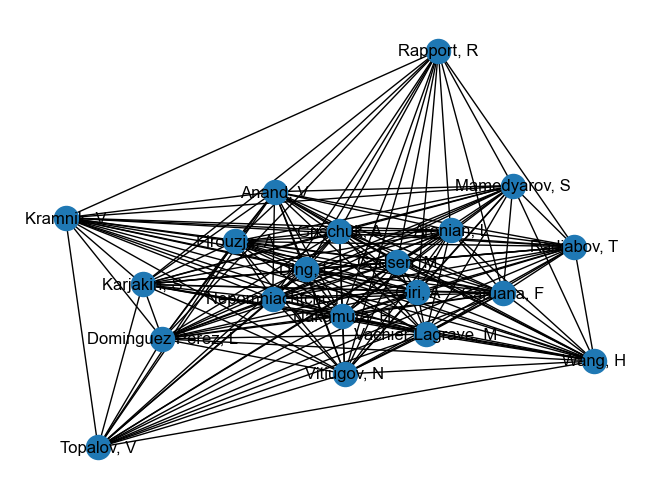

In [30]:
nx.draw(players_graph, with_labels=True)

In [31]:
len(players_graph.nodes)

20

In [32]:
dizionario_delle_comm_associate

{'Ding, L': 0,
 'Nakamura, H': 2,
 'Dominguez Perez, L': 2,
 'Grischuk, A': 0,
 'Wang, H': 2,
 'Giri, A': 0,
 'Rapport, R': 0,
 'Nepomniachtchi, I': 2,
 'Kramnik, V': 2,
 'Aronian, L': 0,
 'Carlsen, M': 0,
 'Firouzja, A': 0,
 'Vitiugov, N': 2,
 'Mamedyarov, S': 0,
 'Vachier Lagrave, M': 2,
 'Anand, V': 2,
 'Topalov, V': 2,
 'Karjakin, S': 0,
 'Caruana, F': 0,
 'Radjabov, T': 0}

In [33]:
players_dict={}

for i in top_player_list:
    players_dict[i]=i

/var/folders/lx/p5pprllx5m17px64p45s4cpr0000gn/T/ipykernel_52489/2966653938.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)
/var/folders/lx/p5pprllx5m17px64p45s4cpr0000gn/T/ipykernel_52489/2966653938.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)


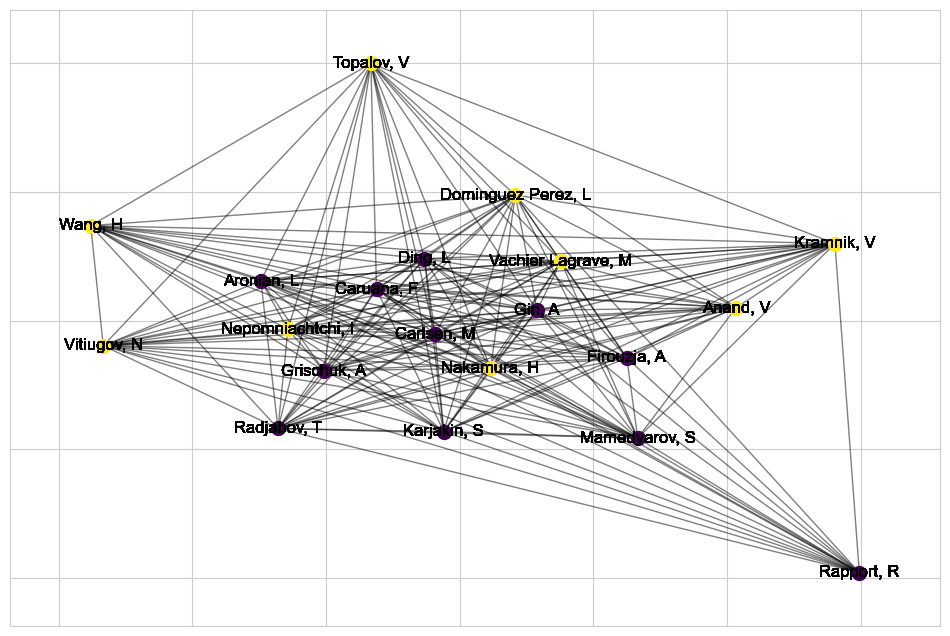

In [34]:

cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)


plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(players_graph)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(dizionario_delle_comm_associate.values())+1)
nx.draw_networkx_edges(players_graph, pos, alpha=0.5)
for node, color in dizionario_delle_comm_associate.items():
    nx.draw_networkx_nodes(players_graph, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]])
    nx.draw_networkx_labels(players_graph,pos,labels=players_dict)
plt.savefig("/Users/francescoaldoventurelli/Desktop/codici_CN/gm_network.jpg")

In [35]:
len(players_graph.nodes)

20

In [36]:
nx.degree(players_graph,'Carlsen, M')

19

In [37]:
nx.degree(players_graph,'Rapport, R')

15

In [38]:
nx.degree(players_graph,'Caruana, F')

19

In [39]:
def nodes_connected(u, v):
    return u in players_graph.neighbors(v)

ciao = nodes_connected('Carlsen, M', 'Rapport, R')

In [40]:
ciao

True

In [41]:
cluster_dict = nx.clustering(players_graph, nodes=players_graph.nodes)

In [42]:
#### Facciamo l'idea di Luca

### prendiamo 2 giocatori dalla STESSA community (0 e 1) 
### andiamo sul df e prendiamo i codici ECO delle partite che i players hanno giocato fra loro
### plottiamo l'hist (x = partita, y = frequenza)
### confrontare questo histo con un altro hist di un'altra community

In [43]:
path = "./chess_data_2020.csv"
path_to_save = "./nx_saved.jpg"

def clean_dataframe(dataframe): #questa funzione pulisce il df eliminando le colonne inutili e droppa i NaN
  df = pd.read_csv(dataframe)
  new_df = pd.DataFrame(df, columns=['White', 'Black', 'Result', 'Date', 'Opening'])
  new_df.dropna()
  return new_df

new_dataframe = clean_dataframe(path)

In [44]:
new_dataframe

,White,Black,Result,Date,Opening
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020","C77 Ruy Lopez, Morphy defence"
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020","C67 Ruy Lopez, Berlin defence, open variation"
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020","D38 Queen's Gambit Declined, Ragozin variation"
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020","D35 Queen's Gambit Declined, 3...Nf6"
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020","E04 Catalan, open, 5.Nf3"
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00 Queen's pawn game
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10 Queen's Gambit Declined Slav defence
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45 Queen's pawn game
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020","D63 Queen's Gambit Declined, Orthodox defence,..."


In [45]:
### voglio il df con solo gli ECO

def save_first3(dataframe):
    new_name = []
    for i in dataframe["Opening"].values:
        
        new_name.append(str(i)[:3])
    
    dataframe = dataframe.drop("Opening", axis=1)
    dataframe.insert(4, "ECO", new_name, False)
    return dataframe

new_dataframe = save_first3(new_dataframe)

In [46]:
new_dataframe

,White,Black,Result,Date,ECO
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020",E04
...,...,...,...,...,...
20173,"Grabinsky, A","Iotov, V",1-0,"Jan 05, 2020",D00
20174,"Ringoir, T","Mulyar, M",1-0,"Jan 05, 2020",D10
20175,"Wheeler, C","Brodsky, D",1-0,"Jan 05, 2020",A45
20176,"Korley, K","Narva, M",1-0,"Jan 05, 2020",D63


In [47]:
new_dataframe[new_dataframe['White'] == 'Carlsen, M']

,White,Black,Result,Date,ECO
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
8,"Carlsen, M","Dubov, D",0-1,"Dec 29, 2020",A15
20,"Carlsen, M","Dubov, D",½-½,"Dec 30, 2020",C48
283,"Carlsen, M","Aronian, L",½-½,"Dec 26, 2020",D38
294,"Carlsen, M","Radjabov, T",½-½,"Dec 26, 2020",D37
...,...,...,...,...,...
18679,"Carlsen, M","Dubov, D",½-½,"Jan 16, 2020",B31
18686,"Carlsen, M","Caruana, F",½-½,"Jan 17, 2020",D37
18700,"Carlsen, M","Vitiugov, N",1-0,"Jan 19, 2020",C84
18714,"Carlsen, M","Kovalev, V",1-0,"Jan 22, 2020",D55


In [48]:
df_solo20w = new_dataframe[new_dataframe['White'].isin(top_player_list)]

In [49]:
df_solo20w

,White,Black,Result,Date,ECO
0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...
18729,"Vitiugov, N","Firouzja, A",½-½,"Jan 25, 2020",C78
18732,"Caruana, F","Duda, J",1-0,"Jan 25, 2020",E06
18734,"Anand, V","Kovalev, V",½-½,"Jan 25, 2020",C61
18739,"Giri, A","Van Foreest, J",½-½,"Jan 26, 2020",D10


In [50]:
df_solo20b = new_dataframe[new_dataframe['Black'].isin(top_player_list)]
df_solo20b

,White,Black,Result,Date,ECO
2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,"Dubov, D","Carlsen, M",½-½,"Dec 29, 2020",E04
5,"So, W","Vachier Lagrave, M",0-1,"Dec 29, 2020",B90
6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...
18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [51]:
dfsolo20 = pd.concat([df_solo20w, df_solo20b])

In [52]:
dfsolo20 = dfsolo20.reset_index()

In [53]:
dfsolo20

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...,...
2298,18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
2299,18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
2300,18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
2301,18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [54]:
dfsolo20[dfsolo20['White'] == 'Carlsen, M']

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
6,8,"Carlsen, M","Dubov, D",0-1,"Dec 29, 2020",A15
14,20,"Carlsen, M","Dubov, D",½-½,"Dec 30, 2020",C48
46,283,"Carlsen, M","Aronian, L",½-½,"Dec 26, 2020",D38
53,294,"Carlsen, M","Radjabov, T",½-½,"Dec 26, 2020",D37
...,...,...,...,...,...,...
2176,11752,"Carlsen, M","Ding, L",1-0,"Apr 30, 2020",B21
2184,11760,"Carlsen, M","Ding, L",0-1,"Apr 30, 2020",C34
2266,18651,"Carlsen, M","Giri, A",½-½,"Jan 11, 2020",A22
2279,18686,"Carlsen, M","Caruana, F",½-½,"Jan 17, 2020",D37


In [55]:
dfsolo20[dfsolo20['Black'] == 'Carlsen, M']

,index,White,Black,Result,Date,ECO
77,329,"Grischuk, A","Carlsen, M",½-½,"Dec 28, 2020",D38
86,342,"Nepomniachtchi, I","Carlsen, M",½-½,"Dec 28, 2020",B33
109,1821,"Giri, A","Carlsen, M",½-½,"Nov 25, 2020",B31
116,1829,"Giri, A","Carlsen, M",0-1,"Nov 25, 2020",C50
119,1832,"Giri, A","Carlsen, M",½-½,"Nov 26, 2020",C53
...,...,...,...,...,...,...
2273,18672,"Van Foreest, J","Carlsen, M",½-½,"Jan 14, 2020",C58
2283,18693,"Anand, V","Carlsen, M",½-½,"Jan 18, 2020",B31
2288,18707,"Firouzja, A","Carlsen, M",0-1,"Jan 21, 2020",C65
2294,18721,"Duda, J","Carlsen, M",½-½,"Jan 24, 2020",C53


In [56]:
dfsolo20.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2298    False
2299    False
2300    False
2301    False
2302    False
Length: 2303, dtype: bool

In [57]:
dfsolo20 = dfsolo20.drop_duplicates()

In [58]:
dfsolo20

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...,...
2298,18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
2299,18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
2300,18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
2301,18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [59]:
dizionario_delle_comm_associate

{'Ding, L': 0,
 'Nakamura, H': 2,
 'Dominguez Perez, L': 2,
 'Grischuk, A': 0,
 'Wang, H': 2,
 'Giri, A': 0,
 'Rapport, R': 0,
 'Nepomniachtchi, I': 2,
 'Kramnik, V': 2,
 'Aronian, L': 0,
 'Carlsen, M': 0,
 'Firouzja, A': 0,
 'Vitiugov, N': 2,
 'Mamedyarov, S': 0,
 'Vachier Lagrave, M': 2,
 'Anand, V': 2,
 'Topalov, V': 2,
 'Karjakin, S': 0,
 'Caruana, F': 0,
 'Radjabov, T': 0}

In [110]:
com2_players = []
for i in dizionario_delle_comm_associate:
    if dizionario_delle_comm_associate[i] == 2:
        com2_players.append(i)


In [61]:
com1_players=[]
for i in dizionario_delle_comm_associate:
    if dizionario_delle_comm_associate[i] == 0:
        com1_players.append(i)

In [111]:
com2_players

['Nakamura, H',
 'Dominguez Perez, L',
 'Wang, H',
 'Nepomniachtchi, I',
 'Kramnik, V',
 'Vitiugov, N',
 'Vachier Lagrave, M',
 'Anand, V',
 'Topalov, V']

In [112]:
len(com2_players)

9

In [64]:
len(com1_players)

11

In [65]:
com1_players

['Ding, L',
 'Grischuk, A',
 'Giri, A',
 'Rapport, R',
 'Aronian, L',
 'Carlsen, M',
 'Firouzja, A',
 'Mamedyarov, S',
 'Karjakin, S',
 'Caruana, F',
 'Radjabov, T']

In [66]:
len(com1_players)

11

In [113]:
len(com2_players)

9

In [68]:
eco_hist_comm1 = [] ## questa è la lista dei top che giocano contro tutti
for i in com1_players:
    for j,k in zip(dfsolo20['White'], dfsolo20['ECO']):
        #print(j)
        if j == i:
            eco_hist_comm1.append(k)
    for j,k in zip(dfsolo20['Black'], dfsolo20['ECO']):
        #print(j)
        if j == i:
            eco_hist_comm1.append(k)

In [69]:
eco_hist_comm1  ### istogramma community nuermo 1

['C53',
 'C77',
 'E60',
 'D37',
 'A07',
 'E06',
 'A15',
 'D17',
 'B90',
 'B13',
 'B13',
 'C50',
 'E62',
 'B90',
 'E62',
 'E60',
 'E01',
 'E47',
 'B30',
 'A81',
 'E15',
 'E00',
 'D16',
 'D16',
 'D37',
 'D37',
 'A05',
 'D78',
 'E06',
 'E48',
 'A08',
 'C50',
 'D38',
 'A20',
 'A88',
 'D20',
 'E32',
 'A88',
 'E06',
 'E97',
 'A13',
 'E94',
 'A20',
 'E90',
 'A20',
 'A20',
 'A35',
 'A07',
 'E60',
 'A40',
 'A20',
 'D27',
 'D27',
 'D27',
 'D25',
 'D20',
 'D11',
 'E10',
 'A15',
 'A14',
 'B31',
 'E01',
 'E02',
 'E06',
 'E60',
 'C67',
 'C53',
 'C50',
 'C50',
 'D45',
 'E51',
 'A07',
 'A07',
 'D73',
 'A07',
 'D12',
 'D14',
 'D15',
 'A35',
 'E60',
 'D70',
 'A05',
 'E06',
 'E06',
 'A29',
 'B00',
 'B30',
 'A20',
 'D17',
 'E00',
 'E00',
 'E60',
 'D37',
 'E60',
 'B54',
 'C67',
 'B97',
 'C50',
 'B90',
 'D02',
 'C67',
 'D02',
 'A48',
 'D41',
 'E91',
 'B90',
 'D43',
 'D37',
 'D02',
 'C45',
 'B11',
 'B92',
 'B90',
 'D43',
 'B51',
 'A20',
 'B90',
 'B90',
 'C65',
 'C65',
 'C65',
 'B52',
 'A06',
 'A05',
 'C65',


In [114]:
eco_hist_comm2 = [] ## questa è la lista dei top che giocano contro tutti
for i in com2_players:
    for j,k in zip(dfsolo20['White'], dfsolo20['ECO']):
        #print(j)
        if j == i:
            eco_hist_comm2.append(k)
    for j,k in zip(dfsolo20['Black'], dfsolo20['ECO']):
        #print(j)
        if j == i:
            eco_hist_comm2.append(k)


In [115]:
eco_hist_comm2

['D38',
 'D38',
 'A07',
 'B51',
 'C67',
 'B11',
 'E04',
 'A08',
 'D82',
 'A45',
 'B90',
 'B90',
 'A45',
 'C24',
 'D41',
 'C24',
 'A07',
 'C43',
 'B93',
 'B68',
 'A29',
 'C67',
 'B90',
 'D37',
 'B19',
 'B10',
 'B46',
 'B18',
 'A00',
 'A00',
 'C65',
 'B51',
 'C77',
 'C65',
 'B42',
 'B50',
 'C67',
 'B11',
 'C20',
 'B12',
 'C42',
 'B12',
 'B50',
 'B12',
 'B60',
 'B56',
 'B60',
 'B33',
 'B33',
 'B67',
 'B67',
 'B90',
 'B90',
 'C67',
 'C67',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'C67',
 'C67',
 'B03',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'C65',
 'B52',
 'A06',
 'A05',
 'C65',
 'B30',
 'D10',
 'B40',
 'D38',
 'B35',
 'C42',
 'C42',
 'C42',
 'C42',
 'C65',
 'C65',
 'C67',
 'C81',
 'C88',
 'C41',
 'B52',
 'B30',
 'B35',
 'B35',
 'B35',
 'A28',
 'D05',
 'C42',
 'E03',
 'C42',
 'B51',
 'D10',
 'D10',
 'A04',
 'A04',
 'D37',
 'D52',
 'C78',
 'B82',
 'B80',
 'E60',
 'D10',
 'E06',
 'B01',
 'C19',
 'B51',
 'D11',
 'D11',
 'C65',
 'C65',
 'A45',
 'A45',
 'D02',


In [116]:
len(eco_hist_comm2)

849

In [73]:
lista_in_cui_ogni_top_affronta_uno_dilui_perlacom1 = []
for i in com1_players:
    for j in com1_players[com1_players.index(i):]:
        for k,t,u in zip(dfsolo20['White'], dfsolo20['Black'], dfsolo20['ECO']):
        #print(j)
            if (k == i and t == j) or (k == j and t == i):
                lista_in_cui_ogni_top_affronta_uno_dilui_perlacom1.append(u)

In [74]:
lista_in_cui_ogni_top_affronta_uno_dilui_perlacom1

['E02',
 'C88',
 'D37',
 'A15',
 'E06',
 'A20',
 'E48',
 'A20',
 'B52',
 'A35',
 'D86',
 'E60',
 'D41',
 'C65',
 'E00',
 'C85',
 'E06',
 'B50',
 'D37',
 'B90',
 'D02',
 'B13',
 'C67',
 'B13',
 'D02',
 'A48',
 'D41',
 'C50',
 'E91',
 'E62',
 'B90',
 'B90',
 'D43',
 'E62',
 'D37',
 'E60',
 'D02',
 'E01',
 'A05',
 'D43',
 'D78',
 'B51',
 'D38',
 'A13',
 'D85',
 'E94',
 'D38',
 'A20',
 'E90',
 'D38',
 'A20',
 'E01',
 'D02',
 'C50',
 'D02',
 'D45',
 'B00',
 'B21',
 'B30',
 'C34',
 'C50',
 'C65',
 'E51',
 'B90',
 'A07',
 'C65',
 'B54',
 'C67',
 'E46',
 'A07',
 'A07',
 'B90',
 'D73',
 'C65',
 'A07',
 'D17',
 'C88',
 'B97',
 'A35',
 'A06',
 'C53',
 'C28',
 'C50',
 'A20',
 'C78',
 'D27',
 'B14',
 'A20',
 'D73',
 'D17',
 'B13',
 'C53',
 'A20',
 'E16',
 'C53',
 'A07',
 'B12',
 'E20',
 'D41',
 'E49',
 'D45',
 'E06',
 'D45',
 'C67',
 'E73',
 'E47',
 'B50',
 'E06',
 'A80',
 'E06',
 'D04',
 'D38',
 'D38',
 'C67',
 'B75',
 'E21',
 'B30',
 'C65',
 'D37',
 'B51',
 'D02',
 'C28',
 'C53',
 'E97',
 'E67',


In [117]:
lista_in_cui_ogni_top_affronta_uno_dilui = []
for i in com2_players:
    for j in com2_players[com2_players.index(i):]:
        for k,t,u in zip(dfsolo20['White'], dfsolo20['Black'], dfsolo20['ECO']):
        #print(j)
            if (k == i and t == j) or (k == j and t == i):
                lista_in_cui_ogni_top_affronta_uno_dilui.append(u)

In [118]:
lista_in_cui_ogni_top_affronta_uno_dilui

['C67',
 'C77',
 'C75',
 'C67',
 'B51',
 'B90',
 'A01',
 'B50',
 'B50',
 'C19',
 'D37',
 'B51',
 'D37',
 'C50',
 'C67',
 'D82',
 'C76',
 'A45',
 'B90',
 'C50',
 'B90',
 'C50',
 'A45',
 'C50',
 'B68',
 'D10',
 'A45',
 'A45',
 'A08',
 'A45',
 'C50',
 'A01',
 'B84',
 'C02',
 'C42',
 'C42',
 'D87',
 'C67',
 'A04',
 'D37',
 'A04',
 'D37',
 'A04',
 'C45',
 'B90',
 'B51',
 'C84',
 'E48',
 'A11',
 'C19',
 'B24',
 'B51',
 'C42',
 'C19',
 'A15',
 'C50',
 'B90',
 'C24',
 'B90',
 'B47',
 'A06',
 'C11',
 'A08',
 'C50',
 'C53']

In [119]:
len(lista_in_cui_ogni_top_affronta_uno_dilui)

65

In [120]:
set(eco_hist_comm2)

{'A00',
 'A01',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A10',
 'A11',
 'A13',
 'A14',
 'A15',
 'A18',
 'A20',
 'A22',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A40',
 'A41',
 'A45',
 'A46',
 'A48',
 'A53',
 'A80',
 'A81',
 'A88',
 'B00',
 'B01',
 'B03',
 'B04',
 'B06',
 'B08',
 'B10',
 'B11',
 'B12',
 'B15',
 'B18',
 'B19',
 'B20',
 'B22',
 'B23',
 'B24',
 'B28',
 'B30',
 'B31',
 'B32',
 'B33',
 'B35',
 'B40',
 'B42',
 'B46',
 'B47',
 'B50',
 'B51',
 'B52',
 'B53',
 'B54',
 'B56',
 'B59',
 'B60',
 'B62',
 'B67',
 'B68',
 'B69',
 'B76',
 'B80',
 'B82',
 'B84',
 'B87',
 'B89',
 'B90',
 'B91',
 'B92',
 'B93',
 'B97',
 'C02',
 'C07',
 'C11',
 'C15',
 'C19',
 'C20',
 'C24',
 'C25',
 'C26',
 'C28',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C47',
 'C48',
 'C50',
 'C53',
 'C55',
 'C60',
 'C61',
 'C63',
 'C64',
 'C65',
 'C67',
 'C70',
 'C75',
 'C76',
 'C77',
 'C78',
 'C79',
 'C80',
 'C81',
 'C82',
 'C83',
 'C84',
 'C88',
 'D02',
 'D04',


In [79]:
lista_comm1 = list(set(eco_hist_comm1))

In [122]:
lista_comm2 = list(set(eco_hist_comm2))

In [123]:
lista_comm2

['D87',
 'C45',
 'C11',
 'B47',
 'D83',
 'C61',
 'C53',
 'D82',
 'B11',
 'C76',
 'D31',
 'D30',
 'A15',
 'E61',
 'C41',
 'B20',
 'B69',
 'A48',
 'D17',
 'A10',
 'C02',
 'E17',
 'E53',
 'C15',
 'D35',
 'C75',
 'D45',
 'B54',
 'A53',
 'B10',
 'B46',
 'C79',
 'B68',
 'B76',
 'E92',
 'E32',
 'C65',
 'D40',
 'C25',
 'D85',
 'C28',
 'B80',
 'A35',
 'A20',
 'C80',
 'D78',
 'A06',
 'E25',
 'E01',
 'E51',
 'C83',
 'E39',
 'C60',
 'C64',
 'A05',
 'E91',
 'B22',
 'A28',
 'D42',
 'A30',
 'A33',
 'B93',
 'B00',
 'E10',
 'E03',
 'D38',
 'B82',
 'D52',
 'A27',
 'A40',
 'D39',
 'E97',
 'E20',
 'E12',
 'A13',
 'A34',
 'E47',
 'D86',
 'B62',
 'B50',
 'B53',
 'B67',
 'A81',
 'C47',
 'B42',
 'E46',
 'C70',
 'B33',
 'B19',
 'E35',
 'B24',
 'B51',
 'B04',
 'B15',
 'A45',
 'A04',
 'E04',
 'D13',
 'A29',
 'B84',
 'D43',
 'C48',
 'C43',
 'C81',
 'D05',
 'E21',
 'D41',
 'E06',
 'D14',
 'B52',
 'C07',
 'B32',
 'C63',
 'A32',
 'C88',
 'E73',
 'C42',
 'A88',
 'C26',
 'B56',
 'B28',
 'E14',
 'A00',
 'B89',
 'A41',


In [124]:
lista_comm2.sort()

In [125]:
lista_comm1.sort()

In [126]:
lista_comm1

['A00',
 'A01',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A11',
 'A13',
 'A14',
 'A15',
 'A18',
 'A20',
 'A22',
 'A25',
 'A28',
 'A29',
 'A30',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A40',
 'A41',
 'A45',
 'A46',
 'A48',
 'A49',
 'A53',
 'A57',
 'A80',
 'A81',
 'A88',
 'A90',
 'B00',
 'B01',
 'B03',
 'B04',
 'B06',
 'B08',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B19',
 'B21',
 'B22',
 'B23',
 'B30',
 'B31',
 'B32',
 'B33',
 'B35',
 'B36',
 'B40',
 'B41',
 'B42',
 'B46',
 'B47',
 'B48',
 'B50',
 'B51',
 'B52',
 'B53',
 'B54',
 'B56',
 'B62',
 'B66',
 'B67',
 'B69',
 'B75',
 'B80',
 'B81',
 'B82',
 'B87',
 'B89',
 'B90',
 'B92',
 'B93',
 'B95',
 'B96',
 'B97',
 'C00',
 'C02',
 'C10',
 'C11',
 'C15',
 'C19',
 'C24',
 'C26',
 'C27',
 'C28',
 'C34',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C46',
 'C47',
 'C48',
 'C49',
 'C50',
 'C51',
 'C53',
 'C55',
 'C58',
 'C60',
 'C64',
 'C65',
 'C67',
 'C70',
 'C75',
 'C77',
 'C78',
 'C80',
 'C81',
 'C82',
 'C84',
 'C85',


In [85]:
lista_comm1[-1]

'nan'

In [127]:
lista_comm2 = lista_comm2[:-1]

In [128]:
lista_comm2

['A00',
 'A01',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A10',
 'A11',
 'A13',
 'A14',
 'A15',
 'A18',
 'A20',
 'A22',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'A33',
 'A34',
 'A35',
 'A36',
 'A37',
 'A40',
 'A41',
 'A45',
 'A46',
 'A48',
 'A53',
 'A80',
 'A81',
 'A88',
 'B00',
 'B01',
 'B03',
 'B04',
 'B06',
 'B08',
 'B10',
 'B11',
 'B12',
 'B15',
 'B18',
 'B19',
 'B20',
 'B22',
 'B23',
 'B24',
 'B28',
 'B30',
 'B31',
 'B32',
 'B33',
 'B35',
 'B40',
 'B42',
 'B46',
 'B47',
 'B50',
 'B51',
 'B52',
 'B53',
 'B54',
 'B56',
 'B59',
 'B60',
 'B62',
 'B67',
 'B68',
 'B69',
 'B76',
 'B80',
 'B82',
 'B84',
 'B87',
 'B89',
 'B90',
 'B91',
 'B92',
 'B93',
 'B97',
 'C02',
 'C07',
 'C11',
 'C15',
 'C19',
 'C20',
 'C24',
 'C25',
 'C26',
 'C28',
 'C41',
 'C42',
 'C43',
 'C44',
 'C45',
 'C47',
 'C48',
 'C50',
 'C53',
 'C55',
 'C60',
 'C61',
 'C63',
 'C64',
 'C65',
 'C67',
 'C70',
 'C75',
 'C76',
 'C77',
 'C78',
 'C79',
 'C80',
 'C81',
 'C82',
 'C83',
 'C84',
 'C88',
 'D02',
 'D04',


In [88]:
eco_dizionario = {}
for i in lista_comm2:
    eco_dizionario[i] =0
    

In [89]:
eco_hist_comm3.sort()

In [90]:
eco_hist_comm3 = eco_hist_comm3[:-1]

In [91]:
for j in eco_hist_comm3:
    eco_dizionario[j] += 1

In [92]:
eco_dizionario

{}

In [93]:
for j in lista_in_cui_ogni_top_affronta_uno_dilui:
    eco_dizionario[j] -= 1

In [94]:
eco_dizionario

{}

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(-0.06, 0, '−0.06'),
  Text(-0.039999999999999994, 0, '−0.04'),
  Text(-0.019999999999999997, 0, '−0.02'),
  Text(0.0, 0, '0.00'),
  Text(0.020000000000000004, 0, '0.02'),
  Text(0.04000000000000001, 0, '0.04'),
  Text(0.06, 0, '0.06')])

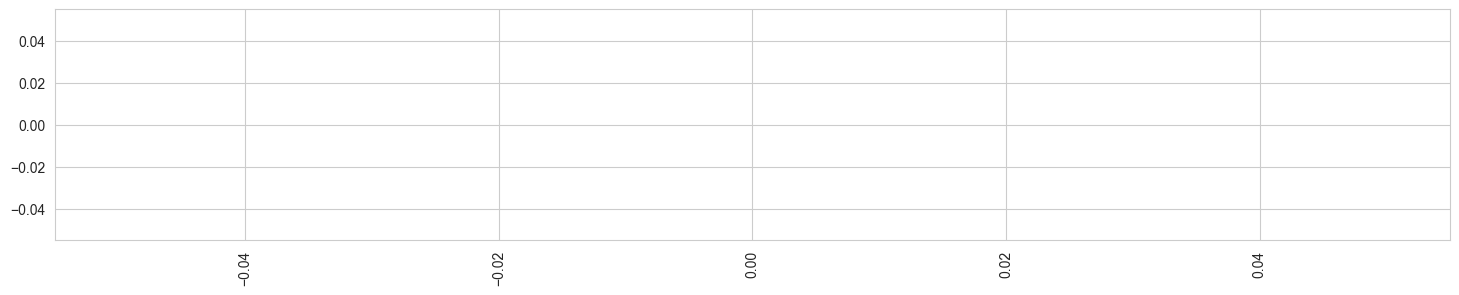

In [95]:
figure = plt.figure(figsize=(18,3))
plt.bar(eco_dizionario.keys(), eco_dizionario.values())
plt.xticks(rotation=90)

In [96]:
treshold = 20   ### imposto una soglia che tolgo cos' da avere un histo più piccolino
altro_diz_con_trsheold = {}
for i in eco_dizionario:
    if eco_dizionario[i] >= treshold:
        altro_diz_con_trsheold[i] = eco_dizionario[i]

In [97]:
norma = sum(altro_diz_con_trsheold.values())

In [98]:
norma

0

In [99]:
valori = np.array(list(altro_diz_con_trsheold.values()))

In [100]:
valori/norma

array([], dtype=float64)

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 [Text(-0.06, 0, '−0.06'),
  Text(-0.039999999999999994, 0, '−0.04'),
  Text(-0.019999999999999997, 0, '−0.02'),
  Text(0.0, 0, '0.00'),
  Text(0.020000000000000004, 0, '0.02'),
  Text(0.04000000000000001, 0, '0.04'),
  Text(0.06, 0, '0.06')])

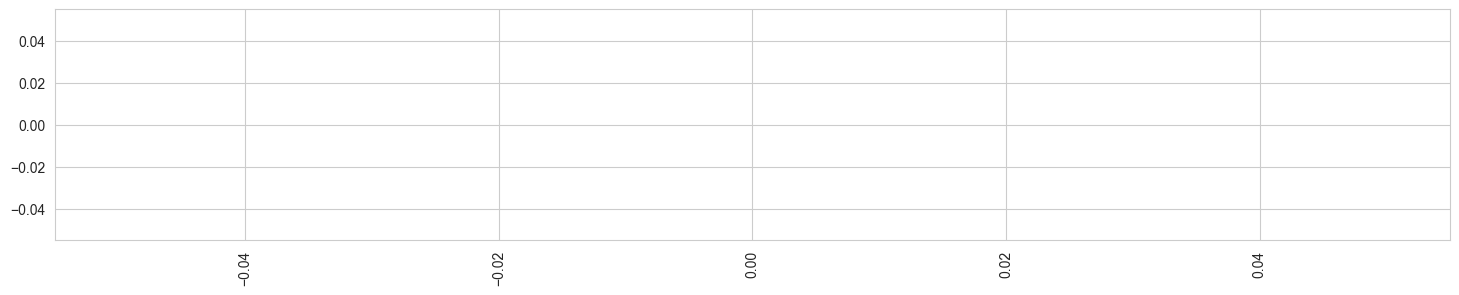

In [101]:
figure = plt.figure(figsize=(18,3))
plt.bar(altro_diz_con_trsheold.keys(), valori/norma)
plt.xticks(rotation=90)

In [102]:
dfsolo20.dropna()

,index,White,Black,Result,Date,ECO
0,0,"Carlsen, M","Dubov, D",1-0,"Dec 29, 2020",C77
1,1,"Vachier Lagrave, M","So, W",½-½,"Dec 29, 2020",C67
2,2,"Nakamura, H","Aronian, L",½-½,"Dec 29, 2020",D38
3,3,"Nepomniachtchi, I","Radjabov, T",½-½,"Dec 29, 2020",D35
4,6,"Aronian, L","Nakamura, H",1-0,"Dec 29, 2020",D02
...,...,...,...,...,...,...
2298,18730,"Xiong, J","Giri, A",½-½,"Jan 25, 2020",B30
2299,18735,"So, W","Carlsen, M",½-½,"Jan 26, 2020",C47
2300,18736,"Kovalev, V","Vitiugov, N",½-½,"Jan 26, 2020",C07
2301,18737,"Duda, J","Anand, V",½-½,"Jan 26, 2020",A18


In [103]:
def histogramma_community(dataframe, community_lista, treshold=20):
    eco_histogram = [] ## questa è la lista dei top che giocano contro tutti
    dataframe.dropna()
    for i in community_lista:
        for j,k in zip(dataframe['White'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
        for j,k in zip(dataframe['Black'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
    lista_in_cui_ogni_top_affronta_uno_dilui = []
    for i in community_lista:
        for j in community_lista[community_lista.index(i):]:
            for k,t,u in zip(dataframe['White'], dataframe['Black'], dataframe['ECO']):
            #print(j)
                if (k == i and t == j) or (k == j and t == i):
                    lista_in_cui_ogni_top_affronta_uno_dilui.append(u)
    eco_histogram_set = list(set(eco_histogram))
    eco_histogram_set.sort()
    for i in range(len(eco_histogram_set)):
        if eco_histogram_set[i]=='nan':
            eco_histogram_set.remove(eco_histogram_set[i])
    for i in range(len(eco_histogram)):
        if eco_histogram[i]=='nan':
            eco_histogram.remove(eco_histogram[i])
    eco_dizionario = {}
    for i in eco_histogram_set:
        eco_dizionario[i] =0
    for j in eco_histogram:
        eco_dizionario[j] += 1
    for j in lista_in_cui_ogni_top_affronta_uno_dilui:
        eco_dizionario[j] -= 1
      ### imposto una soglia che tolgo cos' da avere un histo più piccolino
    altro_diz_con_trsheold = {}
    for i in eco_dizionario:
        if eco_dizionario[i] >= treshold:
            altro_diz_con_trsheold[i] = eco_dizionario[i]
    valori = np.array(list(altro_diz_con_trsheold.values()))
    norma = sum(altro_diz_con_trsheold.values())
    figure = plt.figure(figsize=(18,3))
    plt.bar(altro_diz_con_trsheold.keys(), valori/norma)
    plt.xticks(rotation=90)
    return figure


In [104]:
'''comm1_histo = histogramma_community(dfsolo20, com1_players)
plt.show()''' ### pèerchè non funzia

'comm1_histo = histogramma_community(dfsolo20, com1_players)\nplt.show()'

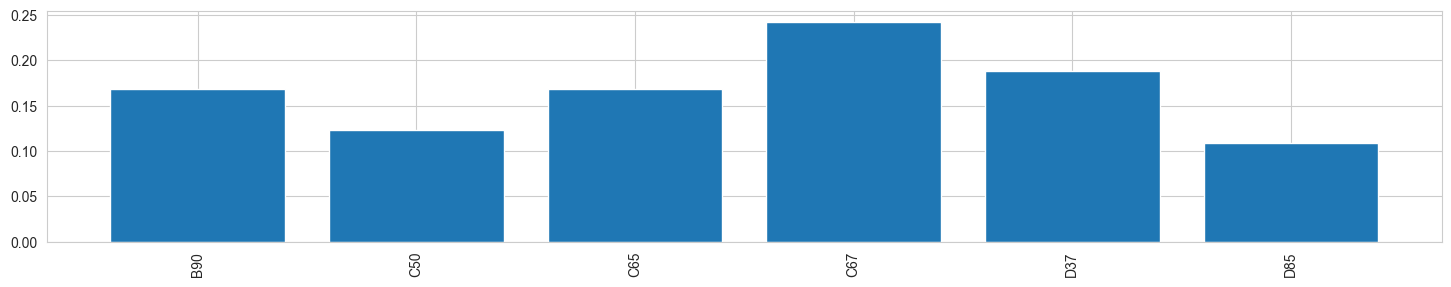

In [129]:
ciao = histogramma_community(dfsolo20, com2_players)
plt.show()

In [106]:
def estrai_df(dataframe, community_lista):
    eco_histogram = [] ## questa è la lista dei top che giocano contro tutti
    dataframe.dropna()
    for i in community_lista:
        for j,k in zip(dataframe['White'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
        for j,k in zip(dataframe['Black'], dataframe['ECO']):
            #print(j)
            if j == i:
                eco_histogram.append(k)
    lista_in_cui_ogni_top_affronta_uno_dilui = []
    for i in community_lista:
        for j in community_lista[community_lista.index(i):]:
            for k,t,u in zip(dataframe['White'], dataframe['Black'], dataframe['ECO']):
            #print(j)
                if (k == i and t == j) or (k == j and t == i):
                    lista_in_cui_ogni_top_affronta_uno_dilui.append(u)
    eco_histogram_set = list(set(eco_histogram))
    eco_histogram_set.sort()
    return eco_histogram, eco_histogram_set, lista_in_cui_ogni_top_affronta_uno_dilui

In [107]:
isto_com1, istoset_com1, listalui_com1 = estrai_df(dfsolo20, com1_players)

In [130]:
isto, istoset, listalui = estrai_df(dfsolo20, com2_players)


In [133]:
isto.sort()
isto[-1]

'E97'

In [137]:
def seconda_part(eco_histogram, eco_histogram_set, lista_in_cui_ogni_top_affronta_uno_dilui,treshold=1, color='blue'):
    for i in range(len(eco_histogram_set)):
        if eco_histogram_set[i]=='nan':
            eco_histogram_set.remove(eco_histogram_set[i])
    for i in range(len(eco_histogram)):
        if eco_histogram[i]=='nan':
            eco_histogram.remove(eco_histogram[i])
    eco_dizionario = {}
    for i in eco_histogram_set:
        eco_dizionario[i] =0
    for j in eco_histogram:
        eco_dizionario[j] += 1
    for j in lista_in_cui_ogni_top_affronta_uno_dilui:
        eco_dizionario[j] -= 1
    ### imposto una soglia che tolgo cos' da avere un histo più piccolino
    altro_diz_con_trsheold = {}
    for i in eco_dizionario:
        if eco_dizionario[i] >= treshold:
            altro_diz_con_trsheold[i] = eco_dizionario[i]
    valori = np.array(list(altro_diz_con_trsheold.values()))
    norma = sum(altro_diz_con_trsheold.values())
    figure = plt.figure(figsize=(18,3))
    plt.bar(altro_diz_con_trsheold.keys(), valori/norma, color=color)
    plt.xticks(rotation=90)
    return figure

<Figure size 900x300 with 0 Axes>

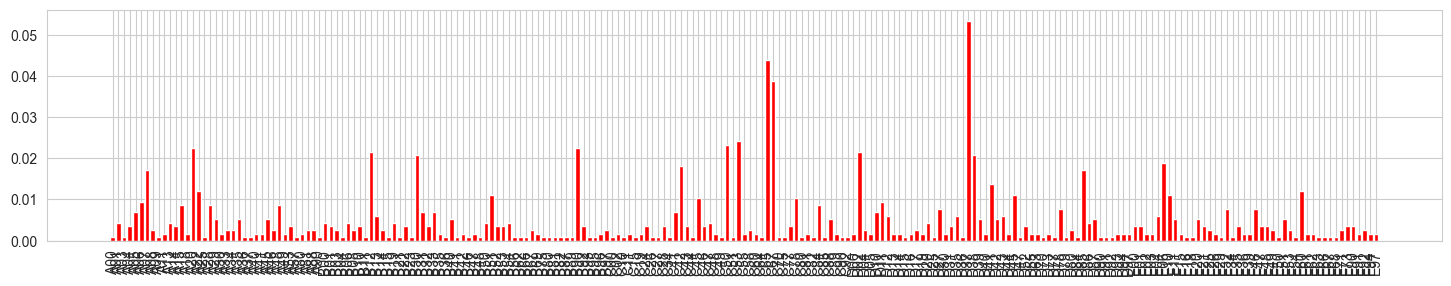

In [142]:
plt.figure(figsize=(9,3))
comm1_histograma = seconda_part(isto_com1, istoset_com1, listalui_com1, color='red')


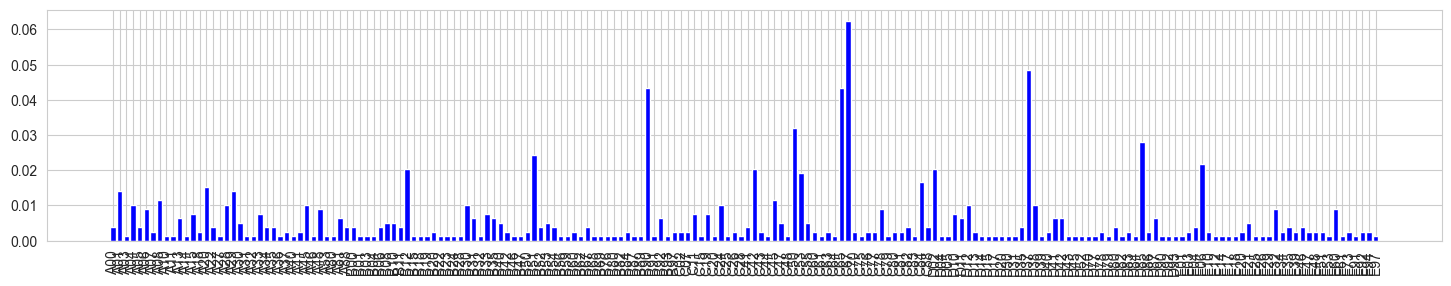

In [139]:
ciao2 = seconda_part(isto, istoset, listalui)

In [136]:
com2_players

['Nakamura, H',
 'Dominguez Perez, L',
 'Wang, H',
 'Nepomniachtchi, I',
 'Kramnik, V',
 'Vitiugov, N',
 'Vachier Lagrave, M',
 'Anand, V',
 'Topalov, V']

**IDEE PROSSIME**
1. Analisi temporale dei networks (net top 20);
- Short range di anni x valutare differenze di scelte di opening da parte dei players;
- Long range di anni x ... nella teoria delle aperture;
